In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
#import lux

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [8]:
df.info(verbose=1, null_counts=True, memory_usage=True)


TypeError: info() got an unexpected keyword argument 'null_counts'

In [ ]:
s = df.shape
print(f'The dataset contains {s[0]} rows and {s[1]-1} independent columns and 1 target variable')

The dataset contains 7043 rows and 20 independent columns and 1 target variable


We need to convert SeniorCitizen to object and TotalCharges to float datatype

In [9]:
# Assuming df is your DataFrame
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Checking missing values

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

NO missing values found


TARGET VARIABLE

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
df['Churn'].value_counts(normalize=True)
#The normalize=True parameter will return the relative frequencies of unique values, giving you a proportion instead of raw counts.

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn'>

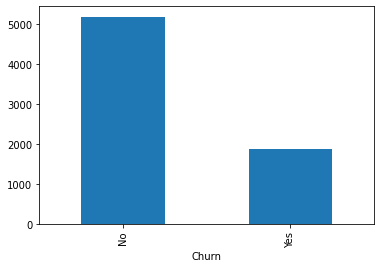

In [14]:
df['Churn'].value_counts().plot.bar()

Clearly the proportion of churned customers are far less than the existing customers. So, from the total customers given in this dataset 26% of the customers have left the teleco services.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical Variables:
customerID (Assuming it's an identifier and not used as a feature)
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn (Target variable)

Ordinal Variables:
SeniorCitizen (Assuming it's a binary variable, but its ordinality might depend on the specific context)

Numerical Variables:
tenure
MonthlyCharges
TotalCharges

In [15]:
# drop customerID because it's just the customer ID
df.drop(['customerID'], axis=1, inplace=True)

Data Visualization Independent Variable (Categorical) - to check **OUTLIERS**

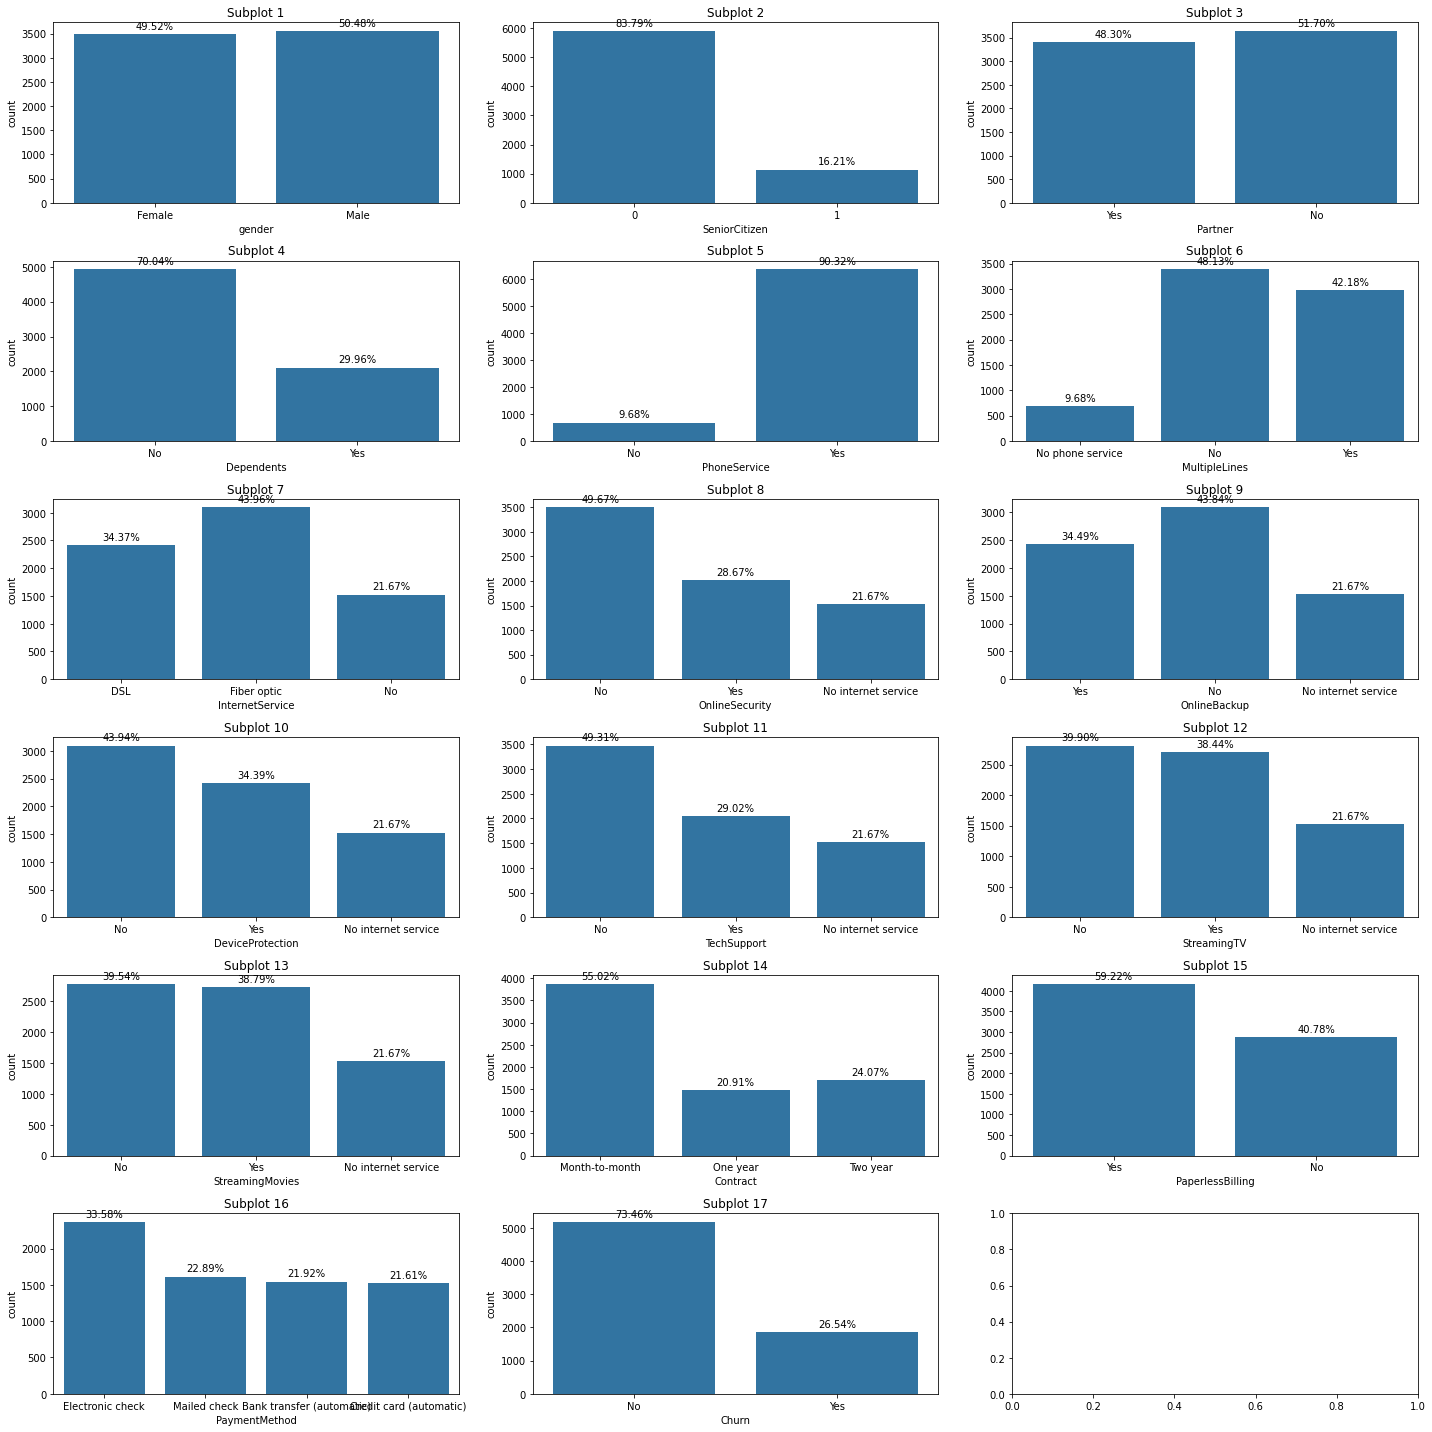

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


object_columns = df.select_dtypes(include='object').columns
num_subplots = len(object_columns)

# Create subplots dynamically based on the number of object columns
fig, axes = plt.subplots((num_subplots + 2) // 3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(object_columns):
    ax = axes[i]
    ax.set_title(f'Subplot {i + 1}')

    # Using Seaborn countplot
    sns.countplot(x=col, data=df, ax=ax)

    # Annotating each bar with the percentage
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{height / total:.2%}'
        ax.annotate(percentage,
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


No outliers found in cat cols

Detecting outliers in categorical columns is a bit different than in numerical columns. In categorical columns, you don't typically have the notion of "outliers" in the same way you do with numerical values. However, you can check for unusual or rare categories that might be considered as outliers based on their frequency.

Here are some approaches:

Value Counts: Check the distribution of each category in your categorical columns using value_counts(). If you see a category with significantly lower frequency compared to others, you might consider it as unusual or rare.
Bar Plots: Visualize the distribution of categories using bar plots. This can help you quickly identify categories with low frequencies.
Rare Category Aggregation: If there are categories with very low frequencies, you might consider aggregating them into a single category to simplify your analysis.
Check for Missing Values: Sometimes, missing values in categorical columns can be considered as a special category. Check if there are any unexpected missing values.
Remember that the definition of "outliers" in categorical columns is somewhat subjective and depends on the context of your data. The goal is to identify categories that are rare or have unusual patterns

Independent Variable (Numerical) - to check OUTLIERS


In [17]:

num_cols=df.select_dtypes(["int","float"]).columns
num_cols
categorical_cols=df.select_dtypes(["object", "bool"]).columns

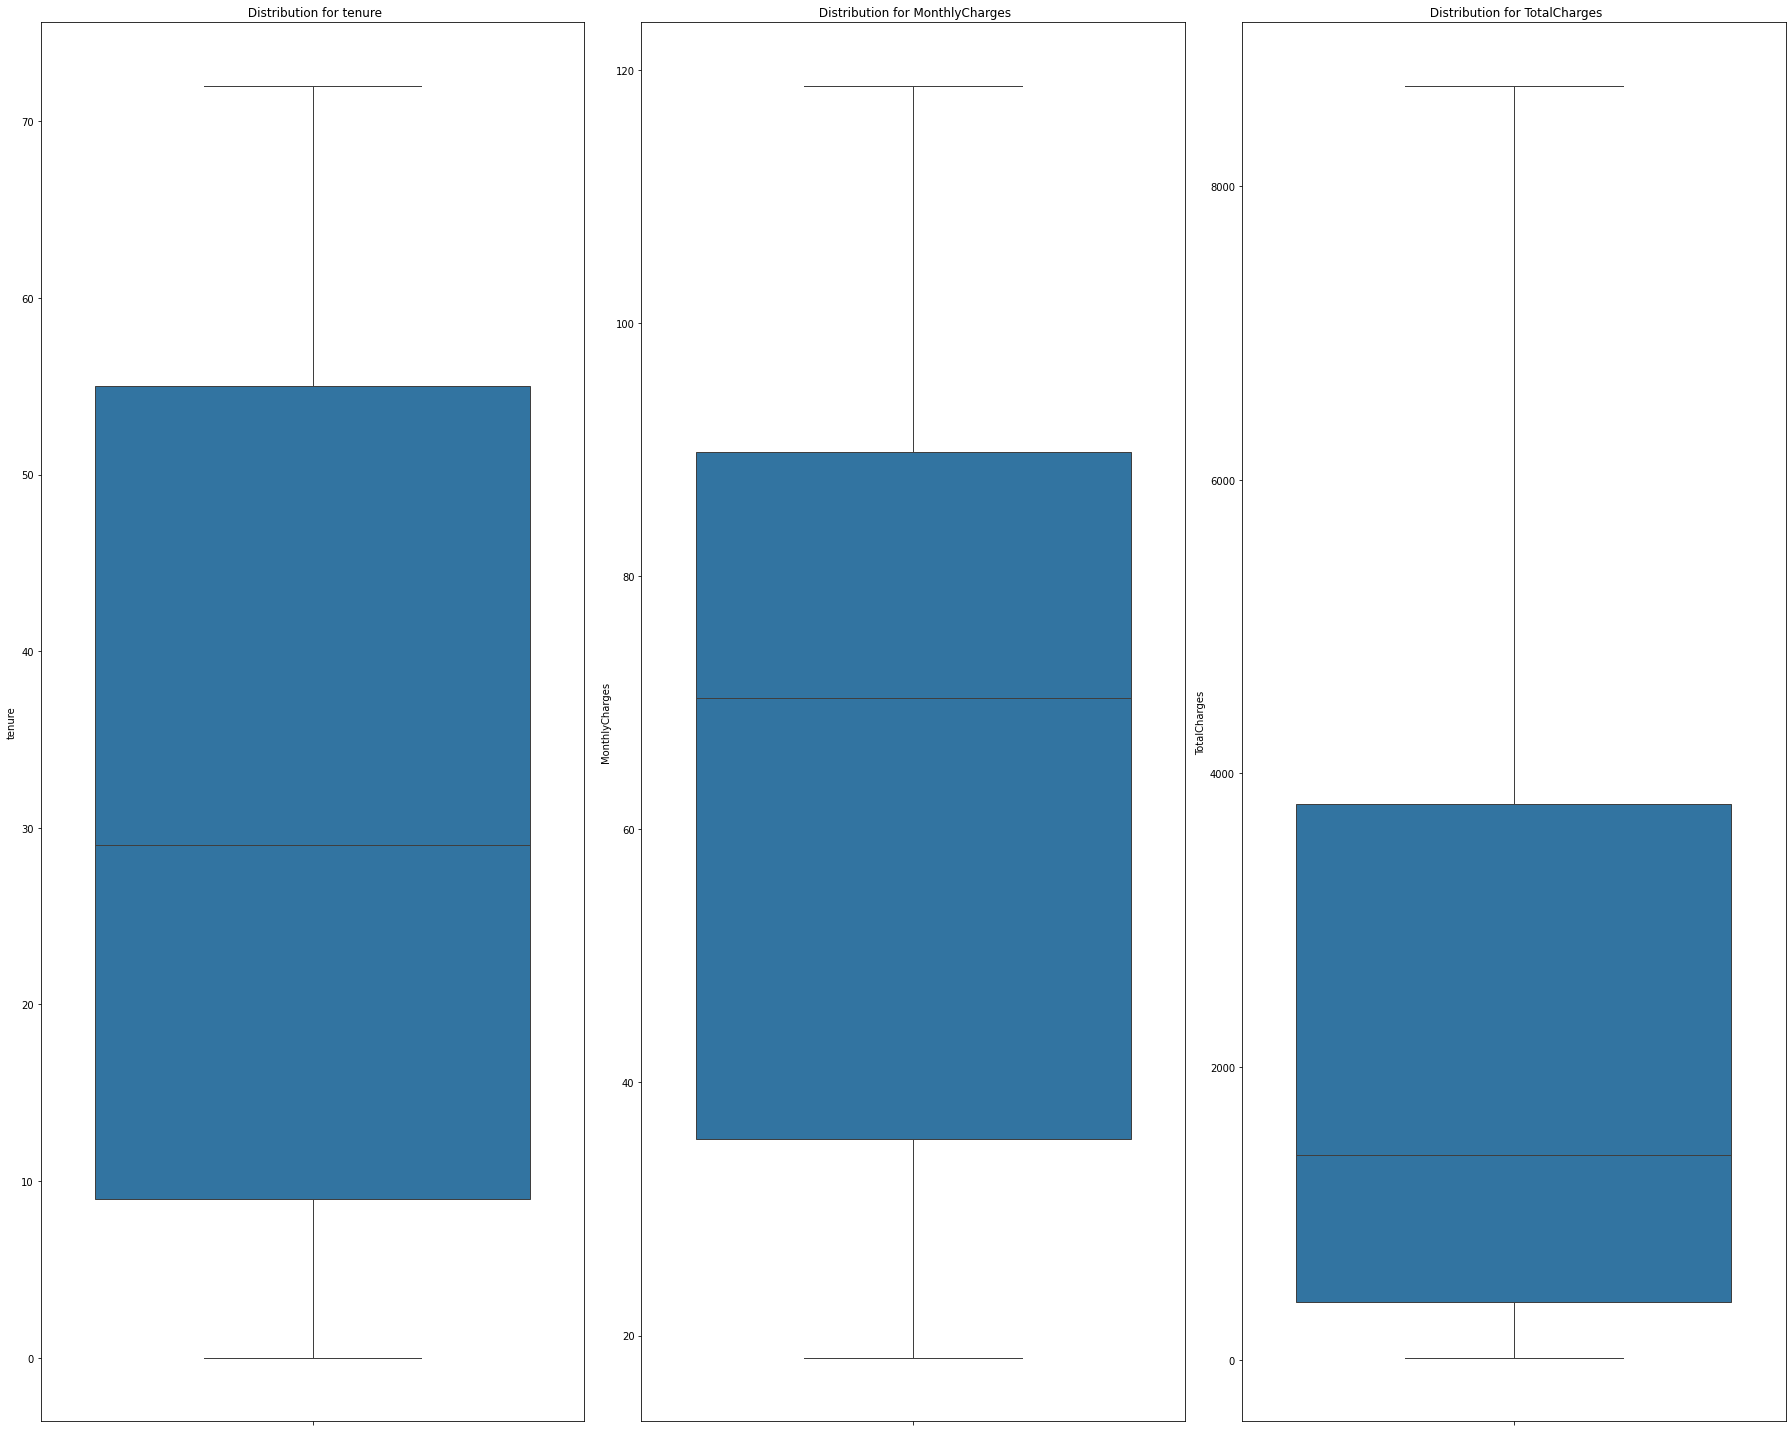

In [18]:
fig, axes = plt.subplots(nrows=1, ncols =3, figsize=(25,20))
plt.subplots_adjust(hspace=0.5)


for i , feature in enumerate(num_cols):


    sns.boxplot(data=df, y=feature, ax = axes[i], orient='v')

    axes[i].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

Insights:
no outliers found in numerical cols


Categorical Independent Variable v/s Target Variable

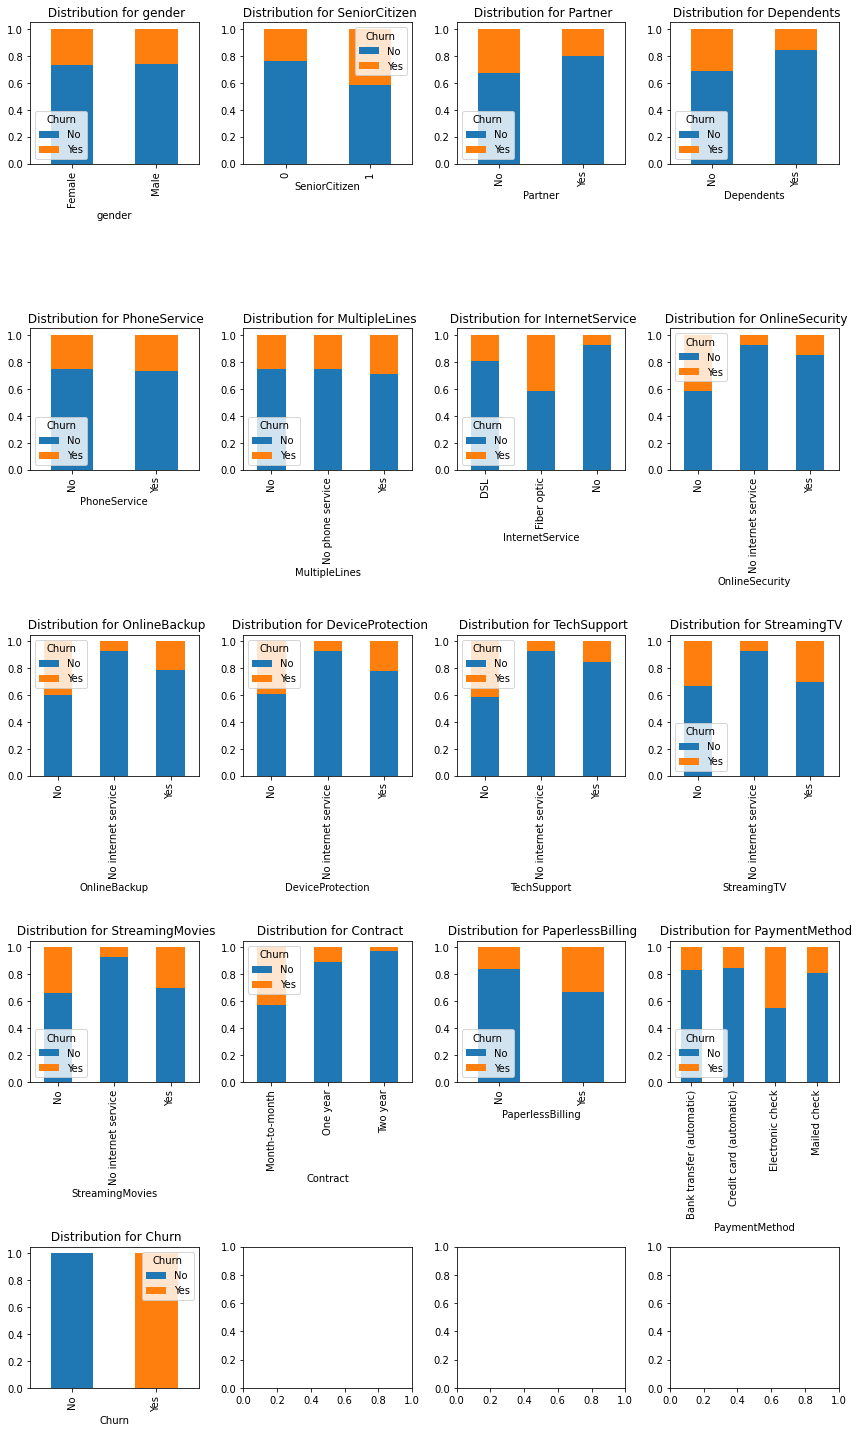

In [19]:
fig, axes = plt.subplots(nrows=5, ncols =4)
plt.subplots_adjust(hspace=0.9)


for i , feature in enumerate(categorical_cols):
    row_index = i//4
    col_index = i%4

    plot=pd.crosstab(df[feature],df['Churn'])
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,20), ax = axes[row_index, col_index])
    axes[row_index, col_index].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

Numerical Independent Variable vs Target Variable

[Text(0, 0, '38'), Text(0, 0, '10')]

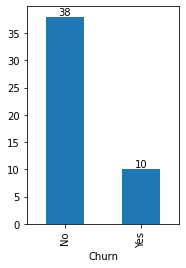

In [20]:
plt.figure(1)
plt.subplot(1, 2, 1)
a = df.groupby('Churn')['tenure'].median().plot.bar()
plt.bar_label(a.containers[0])

[Text(0, 0, '1683.6'), Text(0, 0, '703.55')]

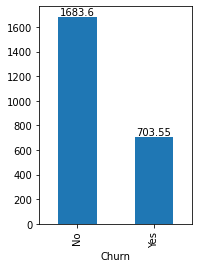

In [21]:
plt.figure(1)
plt.subplot(1, 2, 1)
a = df.groupby('Churn')['TotalCharges'].median().plot.bar()
plt.bar_label(a.containers[0])

#MonthlyCharges


In [22]:
df['Churn'].replace("No", 0, inplace=True)
df['Churn'].replace("Yes", 1, inplace=True)

Churn (customer activity) variable - if the yes then 1 else 0

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

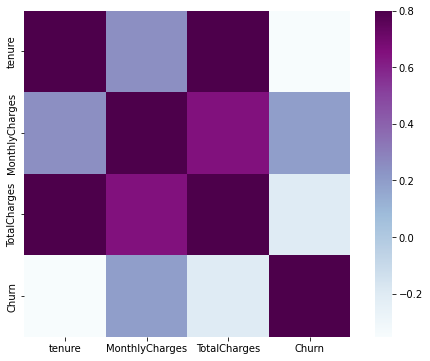

In [23]:
matrix = df[df.select_dtypes(["int","float"]).columns].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

Domain-Specific Analysis:

Depending on the domain and business context, investigate why there is a positive correlation. Are there specific business practices or reasons that explain this relationship? Understanding the context can provide valuable insights.

Predictive Modeling:

If your goal is to build a predictive model, consider whether having both tenure and total_charges as features is redundant due to their high correlation. In some cases, you might choose to keep one of the features or apply dimensionality reduction techniques

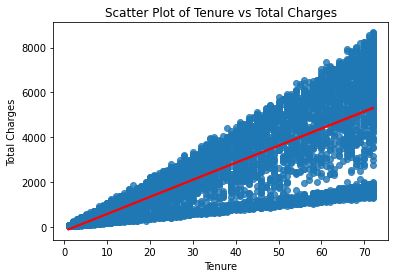

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='tenure', y='TotalCharges', data=df, line_kws={"color": "red"})
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Tenure vs Total Charges')
plt.show()

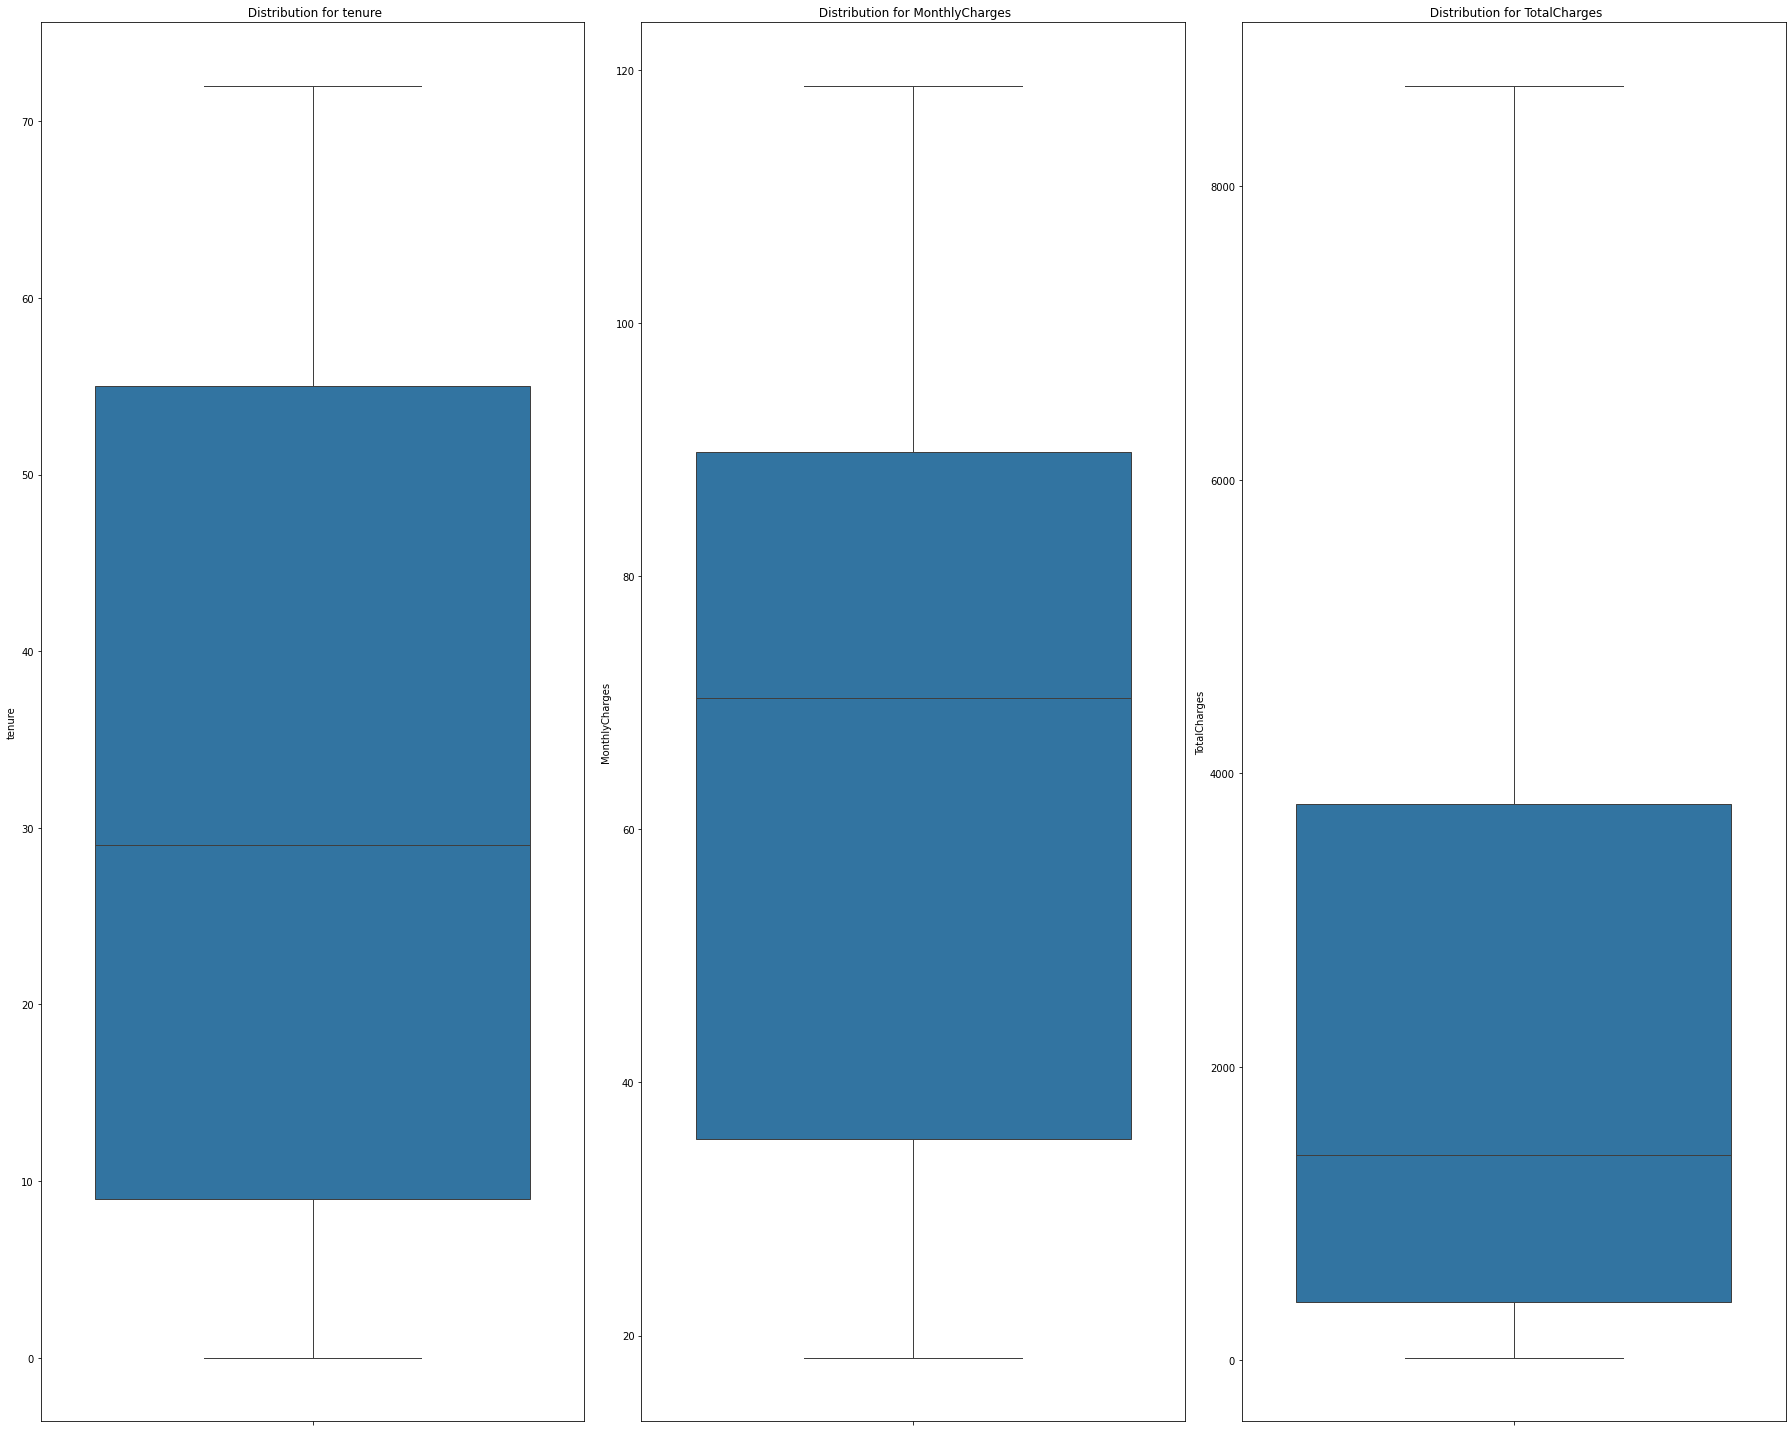

In [25]:
fig, axes = plt.subplots(nrows=1, ncols =3, figsize=(25,20))
plt.subplots_adjust(hspace=0.5)


for i , feature in enumerate(num_cols):


    sns.boxplot(data=df, y= feature, ax = axes[i], orient='v')

    axes[i].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

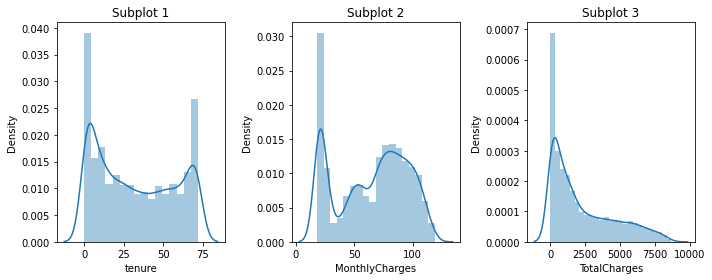

In [26]:
fig, axes = plt.subplots(1,3, figsize=(10,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    plt.title(f'Subplot {i + 1}')
    sns.distplot(df[col],ax=axes[i])
plt.tight_layout()
plt.show()

#Since TotalCharges is extremely right skewed i'll use boxcox transformation on it from scipy import stats

df1['TotalCharges'], lambda_val= stats.boxcox(df1['TotalCharges']+1) df1['TotalCharges'].hist(bins=20)

In [27]:
# Alternative imputation using the mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


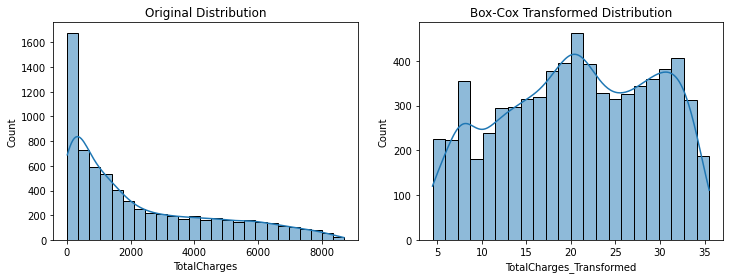

In [28]:
from scipy.stats import boxcox
import numpy as np

# Adding a small constant to handle zero values
total_charges_transformed, _ = boxcox(df['TotalCharges'] + 1)  # Adding 1 to handle zero values

# Create a new column for the transformed values
df['TotalCharges_Transformed'] = total_charges_transformed

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before transformation
sns.histplot(df['TotalCharges'], kde=True, ax=axes[0])
axes[0].set_title('Original Distribution')

# After transformation
sns.histplot(df['TotalCharges_Transformed'], kde=True, ax=axes[1])
axes[1].set_title('Box-Cox Transformed Distribution')

plt.show()


In [29]:
X = df.drop(["Churn"], axis=1)
y = pd.DataFrame(df["Churn"], columns = ["Churn"])

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
df = pd.concat([X,y], axis=1)
df.head()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_Transformed,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,5.472207,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,0
1,34,56.95,1889.50,22.845051,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,0
2,2,53.85,108.15,9.035483,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,1
3,45,42.30,1840.75,22.667781,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,0
4,2,70.70,151.65,10.189949,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1


In [32]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [33]:
df = pd.concat([X,y], axis=1)
df.head()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_Transformed,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,5.472207,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,0
1,34,56.95,1889.50,22.845051,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,0
2,2,53.85,108.15,9.035483,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,1
3,45,42.30,1840.75,22.667781,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,0
4,2,70.70,151.65,10.189949,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   TotalCharges_Transformed               7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   SeniorCitizen_1                        7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

## Machine Learning Model
Random Forest bold text

In [35]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[930 105]
 [185 189]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Random forest tune


In [36]:
rf=RandomForestClassifier()
rf_params = {"n_estimators":[50, 100, 300], 'max_depth':[3,5,7],'max_features': [2,4,6,8],'min_samples_split': [2,4,6]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [37]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 6,
 'n_estimators': 300}

In [38]:
rf_tuned = RandomForestClassifier(max_depth = 7, max_features = 6, min_samples_split = 6, n_estimators = 300).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[947  88]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.68      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## XGBOOST

In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[909 126]
 [170 204]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## XgBOOST tuning

In [ ]:
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50, 100, 300], "subsample":[0.5,0.8,1], "max_depth":[3,5,7], "learning_rate":[0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

xgb_cv_model.best_params_

In [40]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 5, n_estimators= 450, subsample= 0.5).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[936  99]
 [176 198]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



## SVM
Support vector classifier


[[937  98]
 [192 182]]


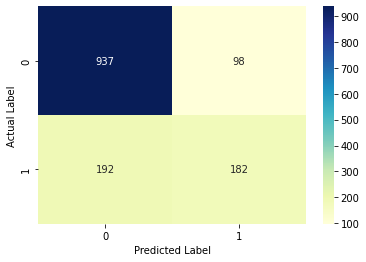

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
svc_model_sc = SVC().fit(X_train_s, y_train)
y_pred = svc_model_sc.predict(X_test_s)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, y_pred))

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear']}
from sklearn.model_selection import GridSearchCV
svc_tuned = GridSearchCV(SVC(),param_grid, verbose=3, refit=True)
svc_tuned.fit(X_train_s, y_train)
print(svc_tuned.best_params_)
print(svc_tuned.best_estimator_)
y_pred = svc_tuned.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   2.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   1.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.823 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

KeyboardInterrupt: 

## Logistic Regression

In [45]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[943  92]
 [181 193]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
log_model_sc = LogisticRegression()
log_model_sc.fit(X_train_s, y_train)
y_pred = log_model_sc.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
knn_model_sc = KNeighborsClassifier(n_neighbors=1).fit(X_train_s, y_train)

y_pred = knn_model_sc.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
error_rate = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_s, y_train)
    y_pred_i = model.predict(X_test_s)
    error_rate.append(np.mean(y_pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
knn_model_sc_tuned = KNeighborsClassifier(n_neighbors=38).fit(X_train_s, y_train)

y_pred = knn_model_sc_tuned.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
import sweetviz
import pandas as pd
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
test = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Churn")
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html